In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm

In [8]:
df=pd.read_csv('/kaggle/input/road-accident-united-kingdom-uk-dataset/UK_Accident.csv')

In [9]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [11]:
df.shape

(1504150, 33)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casualties                         1

In [13]:
df.Year.unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014])

**Number of Casualities in each day of the week in descending order**

In [37]:
df['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
df['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
df['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
df['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
df['Junction_Control'].fillna(value = 'None', inplace = True)
#df['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
df['Latitude'].fillna(value = 0, inplace = True)

In [42]:
data={'Casualities_Count': df['Number_of_Casualties'],'day_of_Week': df['Day_of_Week'] }
accidents_per_week=pd.DataFrame(data)
accidents_per_week.groupby(by='day_of_Week').sum().sort_values(by='Casualities_Count',ascending=False)

,Casualities_Count
day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


In [55]:
accidents_per_week.sample(20)

,Casualities_Count,day_of_Week,Speed_Limit
212493,2,1,30
509106,1,6,30
591683,1,4,30
471879,3,6,40
1395164,1,4,30
652004,1,3,70
439076,1,5,30
811451,1,4,60
1500067,1,6,30
816056,1,4,60


Text(0.5, 0, '1 - Sunday ,  2 - Monday  ,3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday')

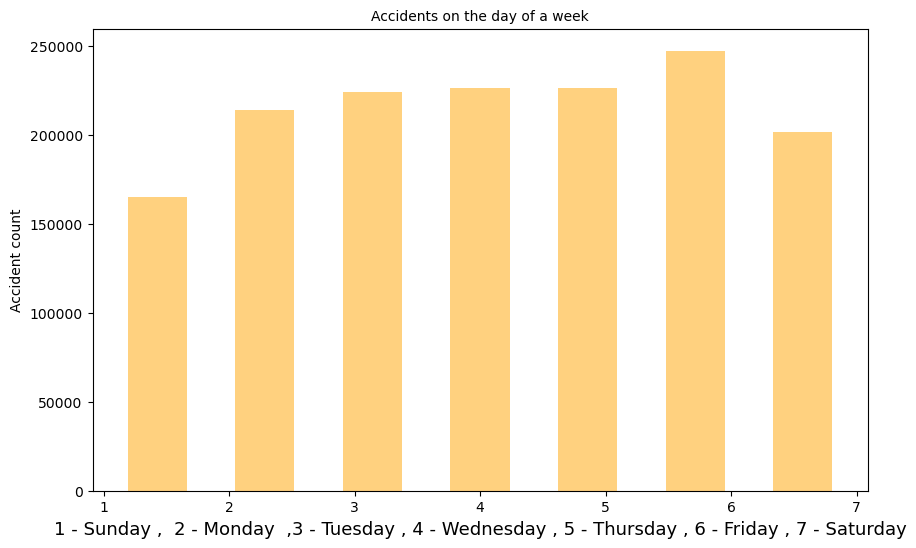

In [49]:
plt.figure(figsize=(10,6))
accidents_per_week.day_of_Week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'orange')
plt.title('Accidents on the day of a week' , fontsize= 10)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 10)
plt.xlabel('1 - Sunday ,  2 - Monday  ,3 - Tuesday , 4 - Wednesday , 5 - Thursday , 6 - Friday , 7 - Saturday' , fontsize = 13)

**Speed limit on the roads where accidents took place**

In [52]:
accidents_per_week['Speed_Limit']=df.Speed_limit

In [53]:
accidents_per_week.sample(4)

,Casualities_Count,day_of_Week,Speed_Limit
1384621,3,3,60
1477483,2,5,60
24671,2,2,30
1478814,1,7,60


In [56]:
accident_severity_data={'Light_Conditions':df.Light_Conditions,
                       'Weather_Conditions':df.Weather_Conditions,
                       'Accident_Severity':df.Accident_Severity}
accident_severity_df=pd.DataFrame(accident_severity_data)
accident_severity_df.head(10)

,Light_Conditions,Weather_Conditions,Accident_Severity
0,Daylight: Street light present,Raining without high winds,2
1,Darkness: Street lights present and lit,Fine without high winds,3
2,Darkness: Street lights present and lit,Fine without high winds,3
3,Daylight: Street light present,Fine without high winds,3
4,Darkness: Street lighting unknown,Fine without high winds,3
5,Daylight: Street light present,Raining without high winds,3
6,Darkness: Street lights present and lit,Fine without high winds,3
7,Daylight: Street light present,Fine without high winds,3
8,Darkness: Street lights present and lit,Fine without high winds,3
9,Daylight: Street light present,Fine without high winds,3


In [58]:
accident_severity_df.describe()

,Accident_Severity
count,1.504150e+06
mean,2.838190e+00
std,4.018423e-01
min,1.000000e+00
25%,3.000000e+00
50%,3.000000e+00
75%,3.000000e+00
max,3.000000e+00


In [59]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 34.4+ MB


**Convert object datatype into category datatype**

In [61]:
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes=='object'].index:
    accident_severity_df[object_feature]=accident_severity_df[object_feature].astype('category')

In [65]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 15 columns):
 #   Column                                                      Non-Null Count    Dtype
---  ------                                                      --------------    -----
 0   Accident_Severity                                           1504150 non-null  int64
 1   Light_Conditions_Darkeness: No street lighting              1504150 non-null  uint8
 2   Light_Conditions_Darkness: Street lighting unknown          1504150 non-null  uint8
 3   Light_Conditions_Darkness: Street lights present and lit    1504150 non-null  uint8
 4   Light_Conditions_Darkness: Street lights present but unlit  1504150 non-null  uint8
 5   Light_Conditions_Daylight: Street light present             1504150 non-null  uint8
 6   Weather_Conditions_Fine with high winds                     1504150 non-null  uint8
 7   Weather_Conditions_Fine without high winds                  1504150 non-null  uin

**One hot encoding the categorical columns**

**Step missing**

In [67]:
accident_severity_df.head(5)

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
accident_severity=accident_severity_df.corr().loc['Accident_Severity':]
accident_severity=pd.DataFrame(accident_severity)

In [72]:
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


<AxesSubplot:>

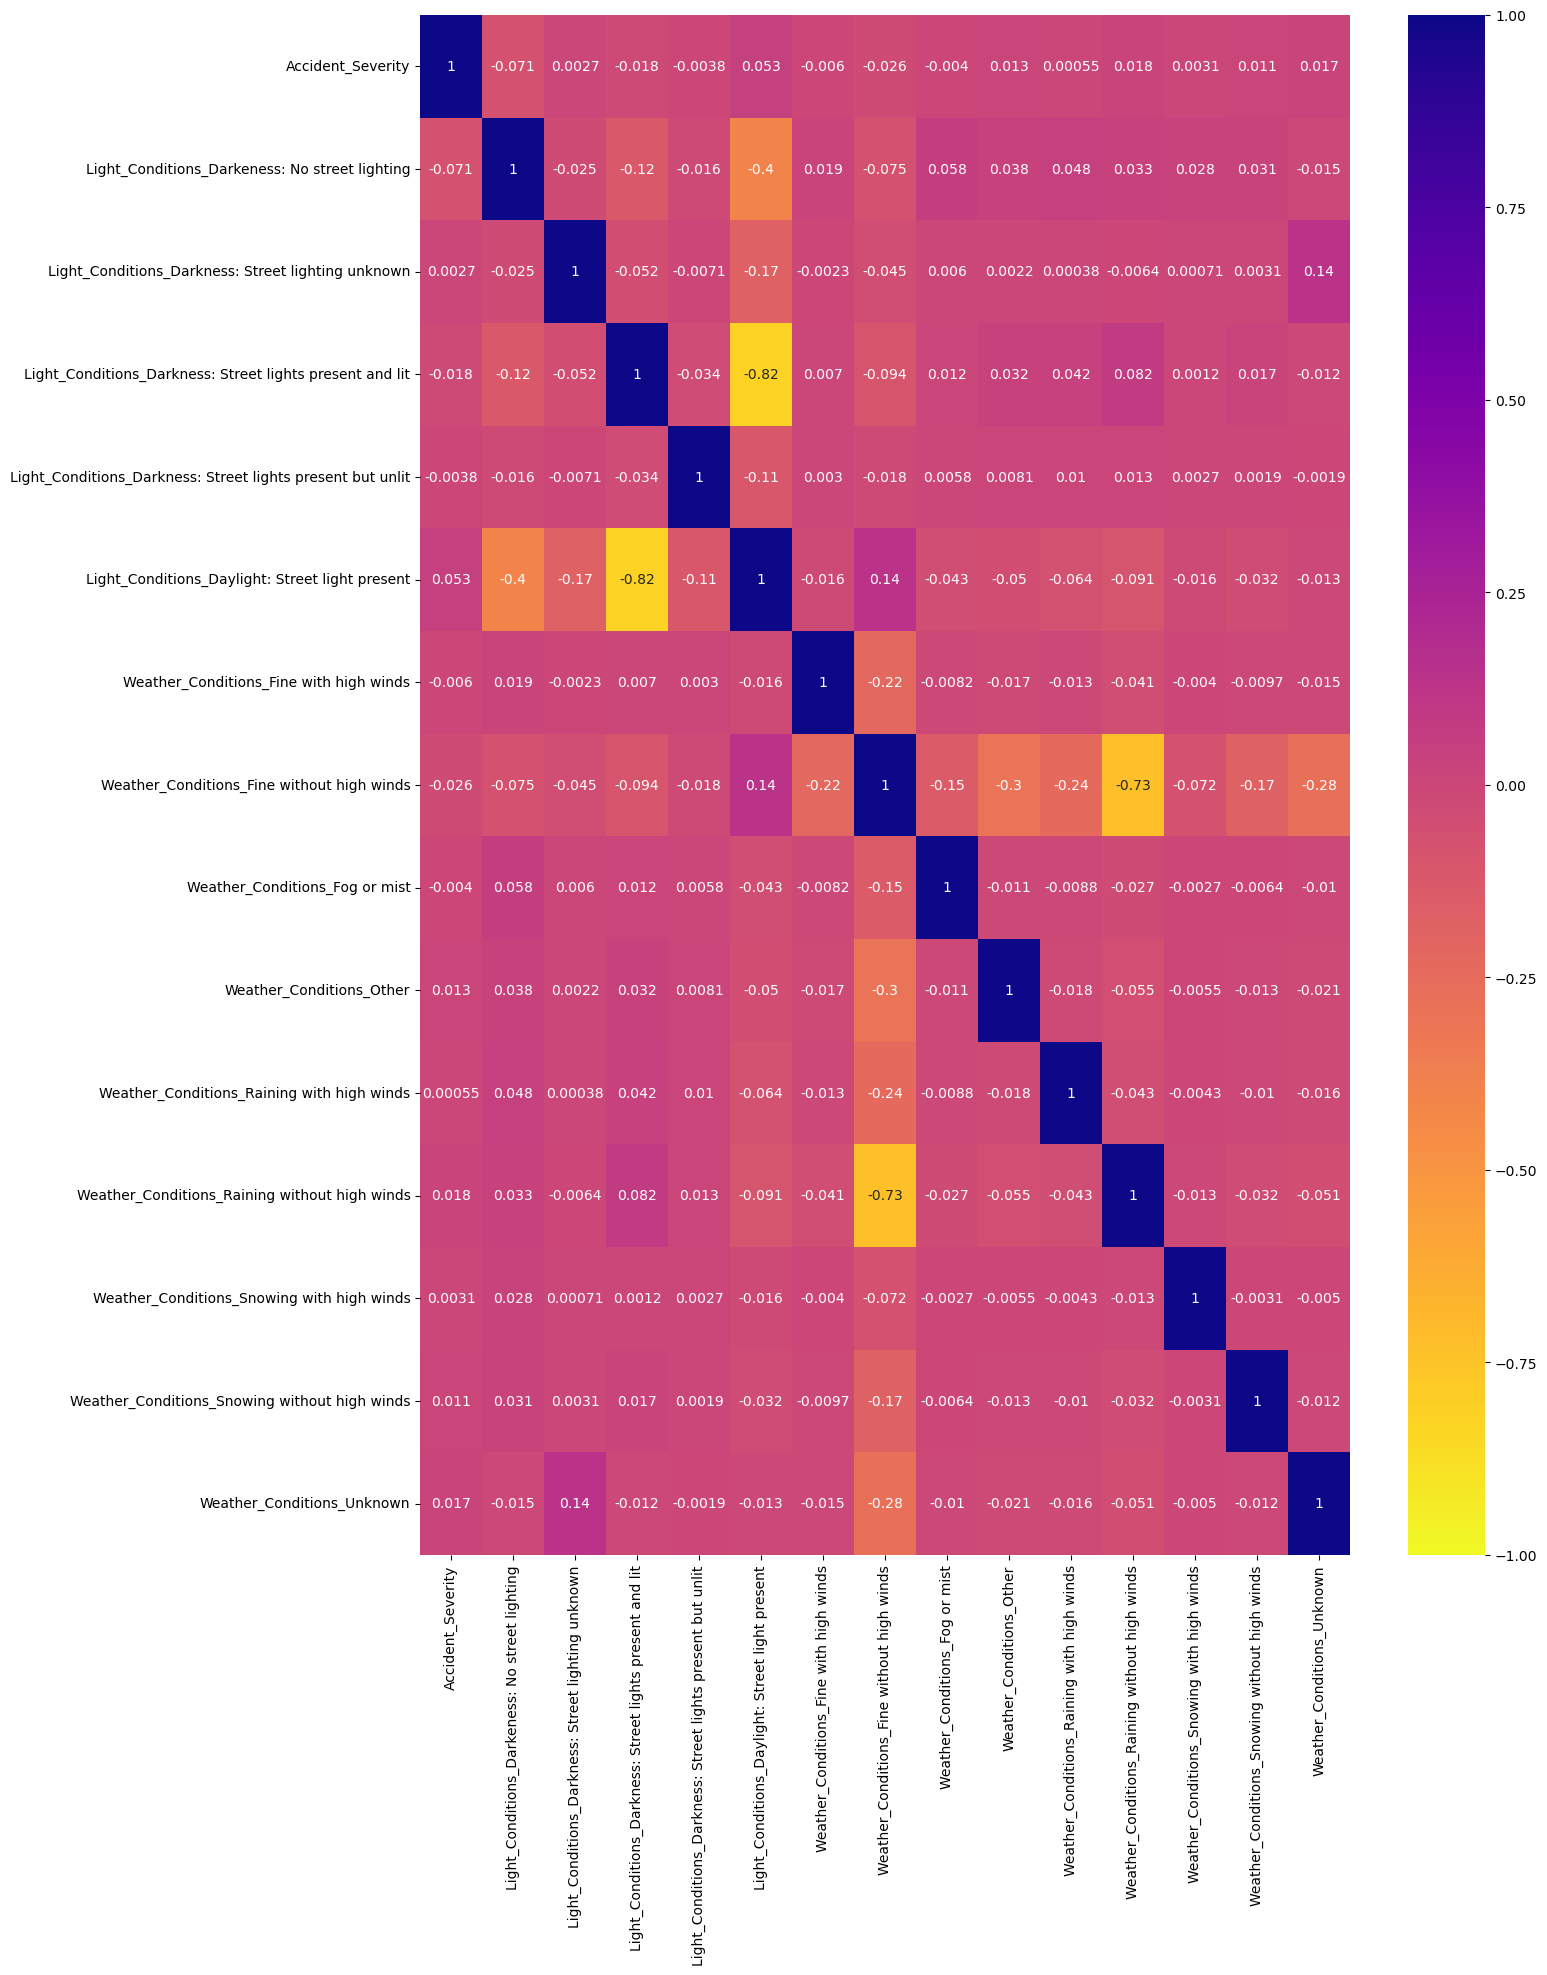

In [73]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity,vmin=-1,cmap='plasma_r',annot=True)

In [74]:
accident_severity_df=df.copy()

In [75]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 28 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Longitude                                    1504049 non-null  float64
 2   Latitude                                     1504150 non-null  float64
 3   Police_Force                                 1504150 non-null  int64  
 4   Accident_Severity                            1504150 non-null  int64  
 5   Number_of_Vehicles                           1504150 non-null  int64  
 6   Number_of_Casualties                         1504150 non-null  int64  
 7   Date                                         1504150 non-null  object 
 8   Day_of_Week                                  1504150 non-null  int64  
 9   Time                                         1

In [86]:

accident_severity_df['Light_Conditions'].value_counts()




Daylight: Street light present               1102222
Darkness: Street lights present and lit       296340
Darkeness: No street lighting                  82559
Darkness: Street lighting unknown              16120
Darkness: Street lights present but unlit       6909
Name: Light_Conditions, dtype: int64

In [87]:
accident_severity_df['Junction_Control'].value_counts()


Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

In [85]:
accident_severity_df['Special_Conditions_at_Site'].value_counts()

None                                               1467568
Roadworks                                            17223
Ol or diesel                                          5243
Mud                                                   4610
Road surface defective                                3664
Auto traffic singal out                               2788
Permanent sign or marking defective or obscured       2269
Auto traffic signal partly defective                   785
Name: Special_Conditions_at_Site, dtype: int64

In [84]:
accident_severity_df['Carriageway_Hazards'].value_counts()

None                                       1476900
Other object in carriageway                  11762
Any animal (except a ridden horse)            8014
Pedestrian in carriageway (not injured)       3586
Involvement with previous accident            2282
Dislodged vehicle load in carriageway         1606
Name: Carriageway_Hazards, dtype: int64

In [82]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts()


No physical crossing within 50 meters          1252571
Pedestrian phase at traffic signal junction     100248
non-junction pedestrian crossing                 79231
Zebra crossing                                   40106
Central refuge                                   27660
Footbridge or subway                              4300
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

In [83]:
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts()

No physical crossing within 50 meters          1252571
Pedestrian phase at traffic signal junction     100248
non-junction pedestrian crossing                 79231
Zebra crossing                                   40106
Central refuge                                   27660
Footbridge or subway                              4300
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64

**Drop columns**

In [88]:
drop_cols=['Carriageway_Hazards','Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities','Special_Conditions_at_Site','Junction_Control']

<AxesSubplot:xlabel='Road_Type', ylabel='Accident_Severity'>

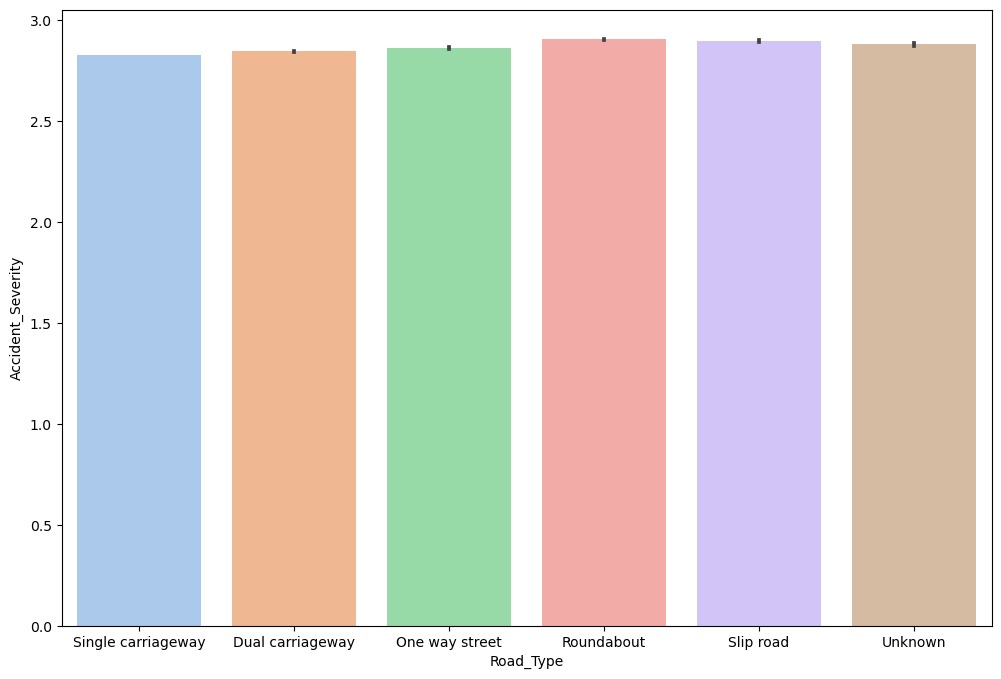

In [90]:
plt.figure(figsize=(12,8))
sns.barplot(x='Road_Type',y='Accident_Severity',data=accident_severity_df,palette='pastel')

In [92]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes=='object'].index:accident_severity_df.drop(columns=feature,inplace=True)

In [93]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 15 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Longitude                   1504049 non-null  float64
 1   Latitude                    1504150 non-null  float64
 2   Police_Force                1504150 non-null  int64  
 3   Accident_Severity           1504150 non-null  int64  
 4   Number_of_Vehicles          1504150 non-null  int64  
 5   Number_of_Casualties        1504150 non-null  int64  
 6   Day_of_Week                 1504150 non-null  int64  
 7   Local_Authority_(District)  1504150 non-null  int64  
 8   1st_Road_Class              1504150 non-null  int64  
 9   1st_Road_Number             1504150 non-null  int64  
 10  Speed_limit                 1504150 non-null  int64  
 11  2nd_Road_Class              1504150 non-null  int64  
 12  2nd_Road_Number             1504150 non-null  int64  
 1

In [97]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 15 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Longitude                   1504049 non-null  float64
 1   Latitude                    1504150 non-null  float64
 2   Police_Force                1504150 non-null  int64  
 3   Accident_Severity           1504150 non-null  int64  
 4   Number_of_Vehicles          1504150 non-null  int64  
 5   Number_of_Casualties        1504150 non-null  int64  
 6   Day_of_Week                 1504150 non-null  int64  
 7   Local_Authority_(District)  1504150 non-null  int64  
 8   1st_Road_Class              1504150 non-null  int64  
 9   1st_Road_Number             1504150 non-null  int64  
 10  Speed_limit                 1504150 non-null  int64  
 11  2nd_Road_Class              1504150 non-null  int64  
 12  2nd_Road_Number             1504150 non-null  int64  
 1

In [99]:
new_matrix=accident_severity_df.corr()

In [101]:
new_matrix

,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Longitude,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.432531,1.000000,0.156826,-0.030076,-0.039285,0.030983,0.003523,0.112444,0.033848,0.043064,0.044220,-0.028189,0.017234,0.042961,-0.010155
Police_Force,-0.369755,0.156826,1.000000,-0.031712,-0.015491,0.007073,0.000428,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,0.013946,-0.030076,-0.031712,1.000000,0.075976,-0.083544,0.002961,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.018442,-0.039285,-0.015491,0.075976,1.000000,0.237349,-0.000116,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,-0.039501,0.030983,0.007073,-0.083544,0.237349,1.000000,-0.001455,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Day_of_Week,-0.001894,0.003523,0.000428,0.002961,-0.000116,-0.001455,1.000000,0.000325,0.006843,0.002344,-0.015944,0.007822,0.000385,-0.016571,-0.003669
Local_Authority_(District),-0.390536,0.112444,0.981975,-0.031995,-0.010506,0.014316,0.000325,1.000000,0.055861,0.010440,0.204926,-0.119100,-0.016618,0.253824,-0.037073
1st_Road_Class,-0.058800,0.033848,0.044895,0.012754,-0.142306,-0.082984,0.006843,0.055861,1.000000,-0.089215,-0.389887,0.103458,-0.033920,-0.226737,-0.010929
1st_Road_Number,-0.082418,0.043064,-0.000199,-0.004072,-0.008871,0.007750,0.002344,0.010440,-0.089215,1.000000,-0.064908,0.035860,0.183900,-0.015504,0.002553


<AxesSubplot:>

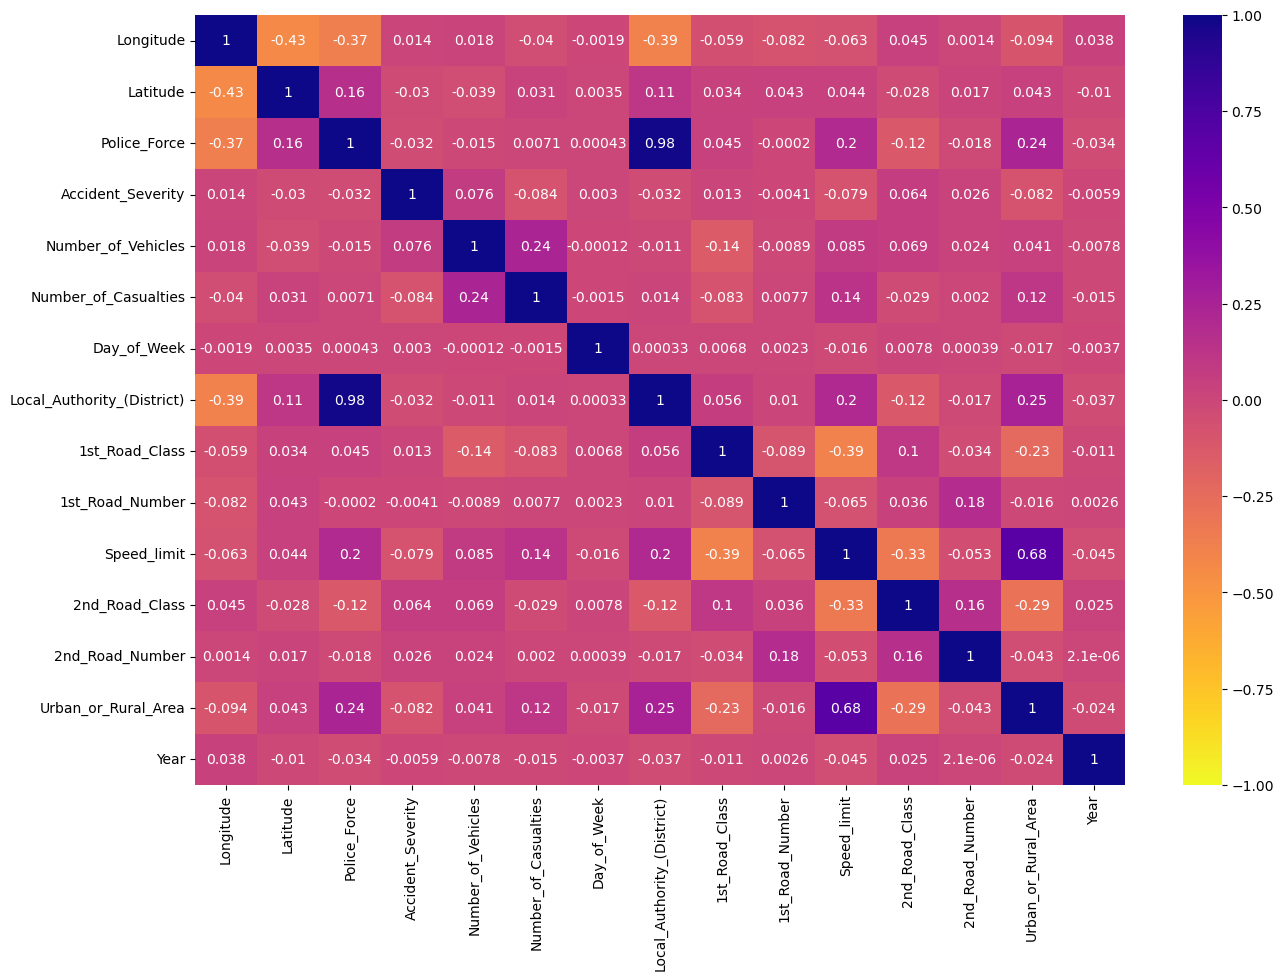

In [102]:
plt.figure(figsize=(15,10))
sns.heatmap(new_matrix,annot=True, vmin=-1,cmap='plasma_r')

<AxesSubplot:>

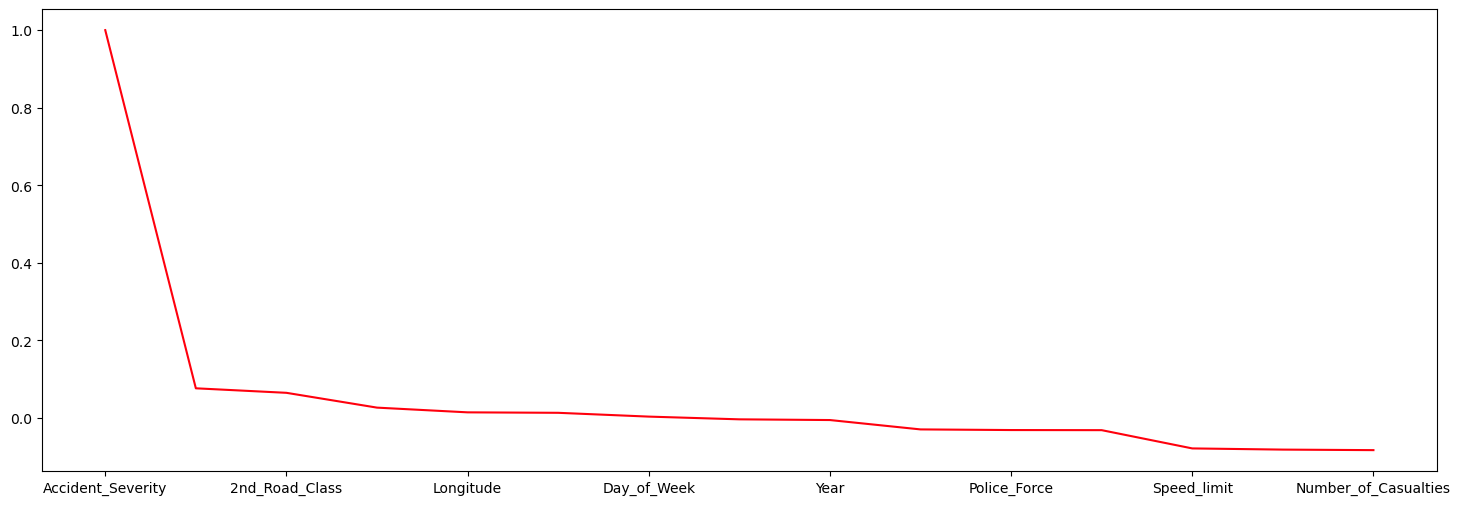

In [103]:
plt.figure(figsize=(18,6))
new_matrix['Accident_Severity'].sort_values(ascending=False).plot(color='#ff000d')

In [104]:
final_accident_severity_df=accident_severity_df.copy()
final_accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 15 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Longitude                   1504049 non-null  float64
 1   Latitude                    1504150 non-null  float64
 2   Police_Force                1504150 non-null  int64  
 3   Accident_Severity           1504150 non-null  int64  
 4   Number_of_Vehicles          1504150 non-null  int64  
 5   Number_of_Casualties        1504150 non-null  int64  
 6   Day_of_Week                 1504150 non-null  int64  
 7   Local_Authority_(District)  1504150 non-null  int64  
 8   1st_Road_Class              1504150 non-null  int64  
 9   1st_Road_Number             1504150 non-null  int64  
 10  Speed_limit                 1504150 non-null  int64  
 11  2nd_Road_Class              1504150 non-null  int64  
 12  2nd_Road_Number             1504150 non-null  int64  
 1

In [106]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes!='object'].index:
    if(new_matrix['Accident_Severity'][feature]<0.02 and new_matrix['Accident_Severity'][feature]>-0.02):
        final_accident_severity_df.drop(columns=feature,inplace=True)

In [107]:
final_accident_severity_df.head(5)

,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
0,51.489096,1,2,1,1,12,30,-1,0,1
1,51.520075,1,3,1,1,12,30,5,0,1
2,51.525301,1,3,2,1,12,30,-1,0,1
3,51.482442,1,3,1,1,12,30,-1,0,1
4,51.495752,1,3,1,1,12,30,-1,0,1
